# Document Classification: Mapping Off Docs to Kappa Web Topics

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pickle
import os
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
output_folder = '/home/stephane/Playground/PycharmProjects/machine-learning/Classification/DataPrep/output/train/'

## Data dictionnaries

Files_features contains the topics attributed by Temis Semantic Enrichment service for each document (i.e. job Ticket) in the training corpus.

Topics contains the mapping between topic ids and topic labels (because reading plain english labels is nicer than numbers :)

In [72]:
files_features = {}
topics = {}
web_topics = {}
web_topics_definitions = {}
mappings = {}
with open(os.path.join(output_folder, 'files_features.pkl'), 'rb') as input_file:
    files_features = pickle.load(input_file)
with open(os.path.join(output_folder, 'topics.pkl'), 'rb') as input_file:
    topics = pickle.load(input_file)
with open(os.path.join(output_folder, 'web_topics.pkl'), 'rb') as input_file:
    web_topics = pickle.load(input_file)
with open(os.path.join(output_folder, 'web_topics_definitions.pkl'), 'rb') as input_file:
    web_topics_definitions = pickle.load(input_file)
with open(os.path.join(output_folder, 'mappings.pkl'), 'rb') as input_file:
    mappings = pickle.load(input_file)    

### Files features initally contains only a "compact" feature vector of official documents.

In [73]:
files_features = Series(files_features)
files_features.sort_values(ascending=True)
files_features.head()

JT00110406    (1472, 1791, 3288, 3327, 3368, 3615, 4478, 491...
JT00112233    (1274, 161, 1913, 2314, 2368, 2399, 3288, 3296...
JT00116286    (1906, 2368, 2382, 3288, 3296, 3302, 3303, 489...
JT00121283    (1187, 2373, 2625, 3704, 3705, 3805, 4444, 460...
JT00123479    (194, 2382, 2563, 3301, 3933, 5474, 5507, 5599...
dtype: object

### Topics series gives the correspondance between topic id and label

In [74]:
topics = Series(topics)
topics = topics.sort_index()
topics.head()

1               development aid
2    international co-operation
4              aid coordination
7              aid institutions
9          development agencies
dtype: object

In [75]:
max_topic = topics.index.max()
max_topic

6665

### Complete with missing topics to get "full" index

In [76]:
full_topic_index = range(1, max_topic+1)
full_topics = topics.reindex(full_topic_index, fill_value='n/a')

In [7]:
full_topics.head(20)

1                 development aid
2      international co-operation
3                             n/a
4                aid coordination
5                             n/a
6                             n/a
7                aid institutions
8                             n/a
9            development agencies
10                            n/a
11               needs assessment
12                            n/a
13                   terms of aid
14                    foreign aid
15                            n/a
16    international organisations
17          regional co-operation
18         regional organisations
19            bilateral relations
20        international relations
dtype: object

## Load file feature vectors

In [77]:
df = pd.read_hdf(path_or_buf=os.path.join(output_folder,'feature_vectors.hdf'), key='feature_vectors')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6656,6657,6658,6659,6660,6661,6662,6663,6664,6665
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03375495,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03376187,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03370006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03377796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03300516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03308729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03372520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, JT03336861 to JT03374028
Columns: 6666 entries, 0 to 6665
dtypes: int8(6666)
memory usage: 5.1+ MB


### Identify columns with only zeros (i.e. unused topics)

In [79]:
v = df.sum(axis=0)
v = v[v == 0]
v.index

Int64Index([   0,    3,    5,    6,    8,   10,   12,   15,   22,   24,
            ...
            6638, 6639, 6640, 6641, 6651, 6652, 6653, 6660, 6661, 6663],
           dtype='int64', length=4423)

### Remove columns with only zeros

In [80]:
df.drop(axis=1, labels=v.index[:], inplace=True)
df.head(10)

,1,2,4,7,9,11,13,14,16,17,...,6650,6654,6655,6656,6657,6658,6659,6662,6664,6665
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03370006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03377796,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
JT03300516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03308729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03372520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use labels rather than ids

In [81]:
df.rename(columns=topics, inplace=True)
df.head(10)

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,foreign corporations,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03370006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03377796,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
JT03300516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03308729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03372520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, JT03336861 to JT03374028
Columns: 2243 entries, development aid to social media
dtypes: int8(2243)
memory usage: 1.7+ MB


### Web Topics gives the hierarchical structure of Kappa Web Topics

In [82]:
web_topics = Series(web_topics)
web_topics_series = web_topics.sort_index()
web_topics_series.head()

KWT-1     [KWT-1-1, KWT-1-2, KWT-1-3, KWT-1-4, KWT-1-5, ...
KWT-10    [KWT-10-1, KWT-10-2, KWT-10-3, KWT-10-4, KWT-1...
KWT-11                                 [KWT-11-1, KWT-11-2]
KWT-12                                 [KWT-12-1, KWT-12-2]
KWT-13    [KWT-13-1, KWT-13-2, KWT-13-3, KWT-13-4, KWT-1...
dtype: object


### Reverse to be able to map level2 back to level1

In [83]:
map_web_topics = {lvl1:k for k,v in web_topics.iteritems() for lvl1 in v}
map_web_topics = Series(map_web_topics)
map_web_topics.head()

KWT-1-1    KWT-1
KWT-1-2    KWT-1
KWT-1-3    KWT-1
KWT-1-4    KWT-1
KWT-1-5    KWT-1
dtype: object

### Web Topics Definitions provides the label of the web topics

In [84]:
web_topics_definitions = Series(web_topics_definitions)
web_topics_definitions = {k:v for k,v in web_topics_definitions.iteritems() if k in web_topics.keys()}
web_topics_definitions

{'KWT-1': 'Agriculture and fisheries',
 'KWT-10': 'Social and welfare issues',
 'KWT-11': 'Health',
 'KWT-12': 'Migration',
 'KWT-13': 'Finance',
 'KWT-14': 'Investment',
 'KWT-15': 'Insurance and pensions',
 'KWT-16': 'Environment',
 'KWT-17': 'Chemical safety and biosafety',
 'KWT-18': 'Green growth and sustainable development',
 'KWT-19': 'Science and technology',
 'KWT-2': 'Education',
 'KWT-20': 'Internet',
 'KWT-21': 'Public governance',
 'KWT-22': 'Regulatory reform',
 'KWT-23': 'Corporate governance',
 'KWT-24': 'Bribery and corruption',
 'KWT-25': 'Competition',
 'KWT-26': 'Innovation',
 'KWT-27': 'Energy',
 'KWT-28': 'Nuclear energy',
 'KWT-29': 'Transport',
 'KWT-3': 'Tax',
 'KWT-4': 'Trade',
 'KWT-5': 'Development',
 'KWT-6': 'Economy',
 'KWT-7': 'Regional, rural and urban development',
 'KWT-8': 'Industry and entrepreneurship',
 'KWT-9': 'Employment'}

In [85]:
web_topics_definitions = Series(web_topics_definitions)
web_topics_definitions.head()

KWT-1     Agriculture and fisheries
KWT-10    Social and welfare issues
KWT-11                       Health
KWT-12                    Migration
KWT-13                      Finance
dtype: object

### Reverse the dictionnary to calculate the number of files per Kappa Web Topics

In [86]:
len(mappings)

807

In [87]:
from collections import Counter
kwt_count = Counter([ map_web_topics.get(kwt) for _,v in mappings.items() for kwt in v])
kwt_count = Series(kwt_count)

In [88]:
d = {'labels':web_topics_definitions, 'count': kwt_count}

In [89]:
kwt_df = DataFrame(d)
kwt_df.head()

,count,labels
KWT-1,29,Agriculture and fisheries
KWT-10,26,Social and welfare issues
KWT-11,22,Health
KWT-12,12,Migration
KWT-13,37,Finance


In [90]:
kwt_df.sort_values(by='count')

,count,labels
KWT-23,10,Corporate governance
KWT-12,12,Migration
KWT-26,14,Innovation
KWT-20,18,Internet
KWT-15,19,Insurance and pensions
KWT-22,20,Regulatory reform
KWT-7,21,"Regional, rural and urban development"
KWT-11,22,Health
KWT-14,25,Investment
KWT-2,25,Education


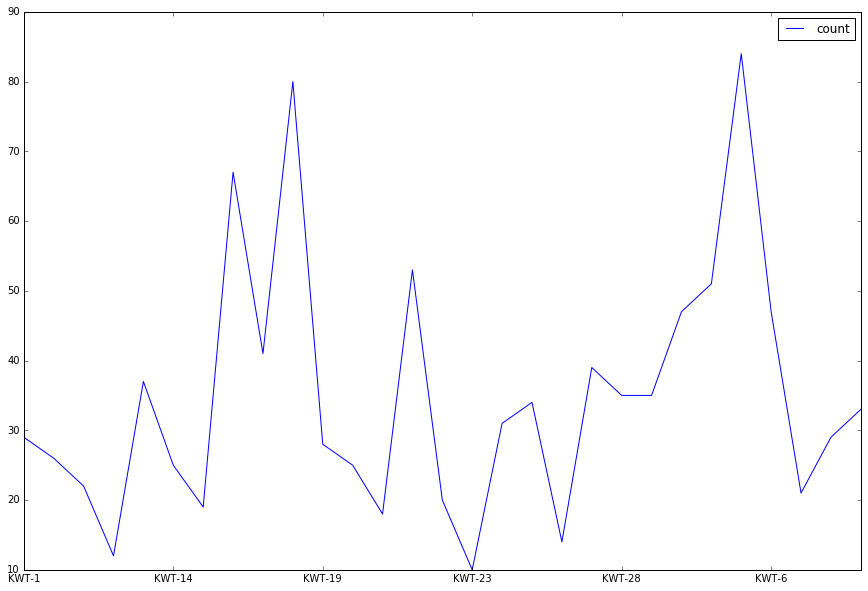

In [91]:
kwt_df.plot()
plt.show()

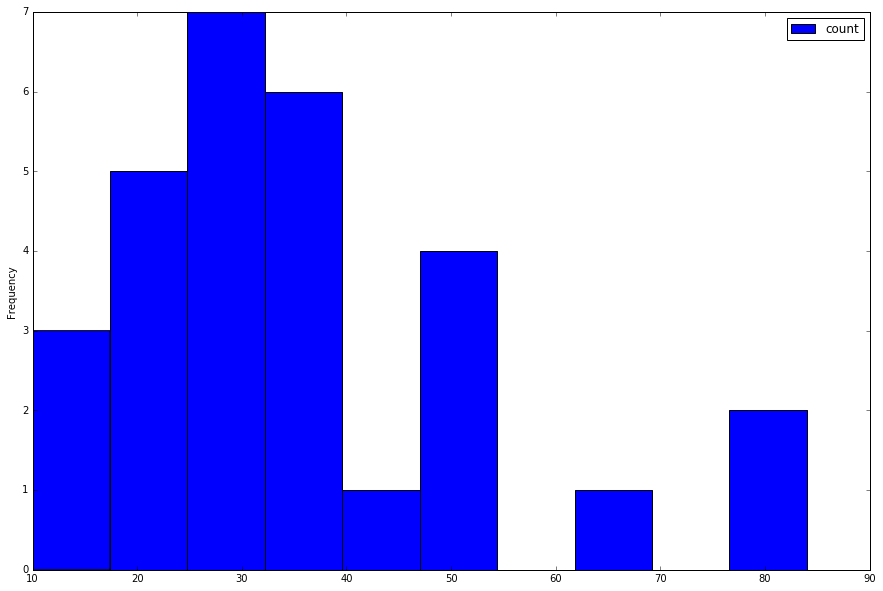

In [92]:
kwt_df.plot.hist()
plt.show()

### Mappings defines the distribution of the Job Tickets to the Kappa Web Topics

In [93]:
with open(os.path.join(output_folder, 'mappings.pkl'), 'rb') as input_file:
    mappings = pickle.load(input_file)    

In [94]:
for i in range(0,11):
    print(list(mappings.keys())[i], mappings[list(mappings.keys())[i]])

JT03345585 ['KWT-8-3']
JT03377793 ['KWT-21-3', 'KWT-24-3']
JT03373400 ['KWT-16-8']
JT03350199 ['KWT-21-8']
JT03297443 ['KWT-28-1']
JT03319949 ['KWT-13-6']
JT03375499 ['KWT-4-8', 'KWT-5-2']
JT03380718 ['KWT-17-7']
JT03264693 ['KWT-5-13']
JT03335798 ['KWT-29-1']
JT03304345 ['KWT-2-1']


In [95]:
def extract_kwt_index(kwt_lbl):
    # print(kwt_lbl)
    parts = kwt_lbl.split('-')
    return np.int8(parts[-1])

In [96]:
mappings_lvl1 = dict()
max_lvl1 = 0
for k,v in mappings.items():
    for lvl2 in v:
        if k not in mappings_lvl1:
            mappings_lvl1[k]=list()
        lvl1 = extract_kwt_index(map_web_topics.get(lvl2))
        if lvl1 > max_lvl1:
            max_lvl1 = lvl1
        mappings_lvl1[k].append(lvl1)

In [97]:
max_lvl1

29

In [98]:
mappings_lvl1 = {k:sorted(v) for k,v in mappings_lvl1.items()}

In [99]:
mappings_lvl1 = {k:i for i in range(1,max_lvl1+1) for k,v in mappings_lvl1.items() if i in v}

In [100]:
mappings_lvl1

{'JT00110406': 18,
 'JT00112233': 18,
 'JT00116286': 18,
 'JT00121283': 20,
 'JT00123479': 18,
 'JT00134530': 10,
 'JT00138668': 25,
 'JT00142198': 10,
 'JT00143720': 18,
 'JT00161008': 18,
 'JT00180386': 25,
 'JT00180823': 12,
 'JT00184362': 25,
 'JT00186152': 25,
 'JT00191373': 25,
 'JT03210149': 25,
 'JT03214432': 26,
 'JT03217398': 19,
 'JT03220370': 25,
 'JT03222439': 18,
 'JT03227116': 25,
 'JT03229729': 10,
 'JT03232365': 12,
 'JT03235713': 25,
 'JT03239058': 25,
 'JT03240031': 25,
 'JT03240471': 5,
 'JT03240486': 5,
 'JT03242692': 16,
 'JT03245276': 2,
 'JT03245681': 5,
 'JT03247494': 19,
 'JT03248021': 18,
 'JT03248862': 10,
 'JT03249726': 25,
 'JT03252688': 12,
 'JT03252785': 25,
 'JT03253847': 17,
 'JT03254098': 18,
 'JT03254501': 25,
 'JT03255955': 13,
 'JT03256062': 6,
 'JT03258547': 16,
 'JT03260273': 18,
 'JT03261602': 21,
 'JT03262697': 16,
 'JT03263368': 18,
 'JT03263771': 9,
 'JT03264146': 2,
 'JT03264496': 9,
 'JT03264693': 5,
 'JT03265467': 5,
 'JT03266479': 9,
 'JT

In [101]:
labels_mappings = list(range(1, max_lvl1+1))
labels_mappings

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [102]:
mappings_df = DataFrame.from_dict(data=mappings_lvl1, orient='index', dtype=np.int8, )
mappings_df.sort_index
mappings_df.head()

,0
JT03345585,8
JT03377793,24
JT03373400,16
JT03350199,21
JT03297443,28


In [103]:
mappings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, JT03345585 to JT03347764
Data columns (total 1 columns):
0    807 non-null int8
dtypes: int8(1)
memory usage: 7.1+ KB


### Concatenate mappings as last columns of DataFrame

In [104]:
files_mappings_df = df.join(mappings_df)
files_mappings_df.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media,0
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [119]:
files_mappings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, JT03336861 to JT03374028
Columns: 2272 entries, development aid to 28
dtypes: int8(2272)
memory usage: 1.7+ MB


### Save data frame

In [105]:
files_mappings_df.to_hdf(path_or_buf=os.path.join(output_folder, 'files_mappings_df.hd5'), key='files_mappings')

/home/stephane/Playground/PycharmProjects/Machine-Learning/env/lib/python3.5/site-packages/pandas/io/pytables.py:260: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/home/stephane/Playground/PycharmProjects/Machine-Learning/env/lib/python3.5/site-packages/pandas/io/pytables.py:260: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)


### Load data frame

In [106]:
files_mappings_df = pd.read_hdf(path_or_buf=os.path.join(output_folder, 'files_mappings_df.hd5'), key='files_mappings')
files_mappings_df.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media,0
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
